In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('/content/taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [4]:
df = df[['Trip_Distance_km', 'Trip_Price']]

In [5]:
df

,Trip_Distance_km,Trip_Price
0,19.35,36.2624
1,47.59,NaN
2,36.87,52.9032
3,30.33,36.4698
4,NaN,15.6180
...,...,...
995,5.49,34.4049
996,45.95,62.1295
997,7.70,33.1236
998,47.56,61.2090


Finding Null Values

In [6]:
df.isnull().sum()

,0
Trip_Distance_km,50
Trip_Price,49


Imputing Null Values

In [7]:
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(),inplace=True)
df['Trip_Price'].fillna(df['Trip_Price'].median(),inplace=True)

After Filling the Null Values

In [8]:
df.isnull().sum()

,0
Trip_Distance_km,0
Trip_Price,0


In [9]:
df.describe()

,Trip_Distance_km,Trip_Price
count,1000.000000,1000.000000
mean,27.008520,56.541560
std,19.402661,39.492129
min,1.230000,6.126900
25%,13.107500,34.578850
50%,25.830000,50.074500
75%,37.782500,67.476650
max,146.067047,332.043689


Finding Outliers in Dataset by using Box Plot

<Axes: ylabel='Trip_Distance_km'>

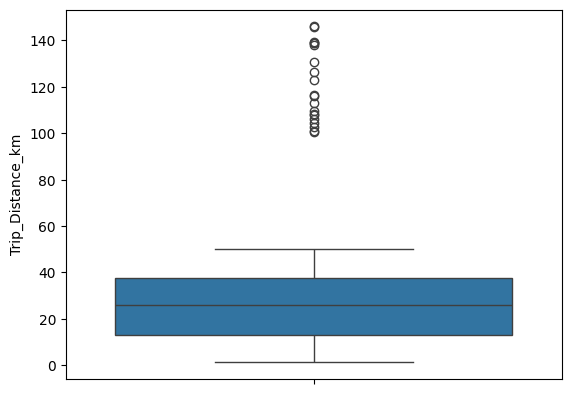

In [10]:
sns.boxplot(y=df['Trip_Distance_km'])

<Axes: ylabel='Trip_Price'>

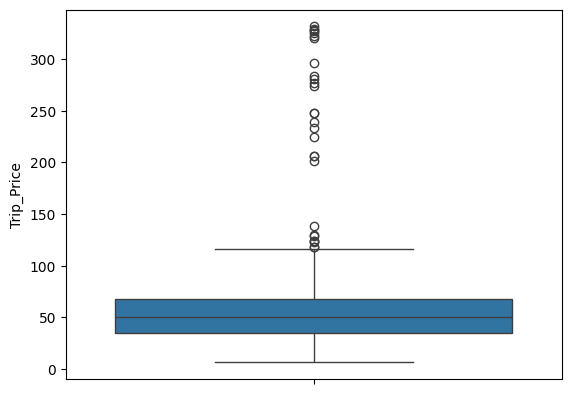

In [11]:
sns.boxplot(y=df['Trip_Price'])

After Treating Outliers

In [12]:
Q1 = df['Trip_Distance_km'].quantile(0.25)
Q3 = df['Trip_Distance_km'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Trip_Distance_km'] >= lower_bound) & (df['Trip_Distance_km'] <= upper_bound)]

<Axes: ylabel='Trip_Distance_km'>

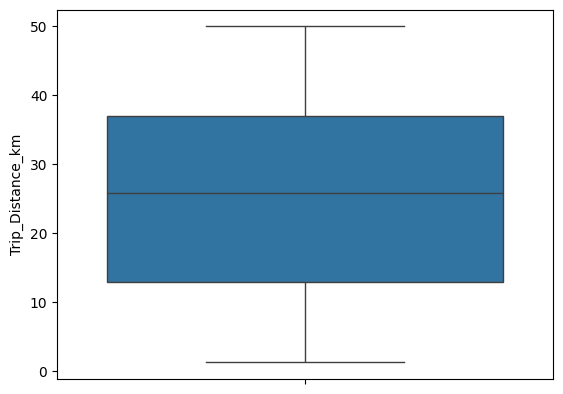

In [13]:
sns.boxplot(y=df['Trip_Distance_km'])

In [14]:
Q1 = df['Trip_Price'].quantile(0.25)
Q3 = df['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Trip_Price'] >= lower_bound) & (df['Trip_Price'] <= upper_bound)]

<Axes: ylabel='Trip_Price'>

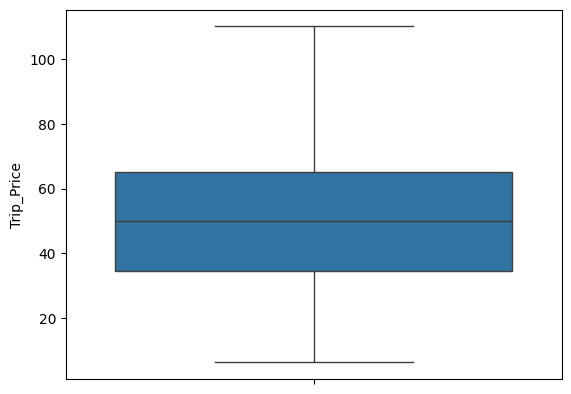

In [15]:
sns.boxplot(y=df['Trip_Price'])

In [16]:
df.describe()

,Trip_Distance_km,Trip_Price
count,970.000000,970.000000
mean,24.914443,51.340326
std,13.950171,22.441371
min,1.230000,6.126900
25%,12.852500,34.318600
50%,25.830000,50.074500
75%,36.710000,65.187950
max,49.990000,110.254400


In [17]:
X = df[['Trip_Distance_km']]
y = df['Trip_Price']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
MSE=mean_squared_error(y_test,y_pred)
MSE

290.073430056671

In [25]:
np.sqrt(MSE)

17.03154221016614

In [26]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.06049031]
Intercept: 24.68247804255724


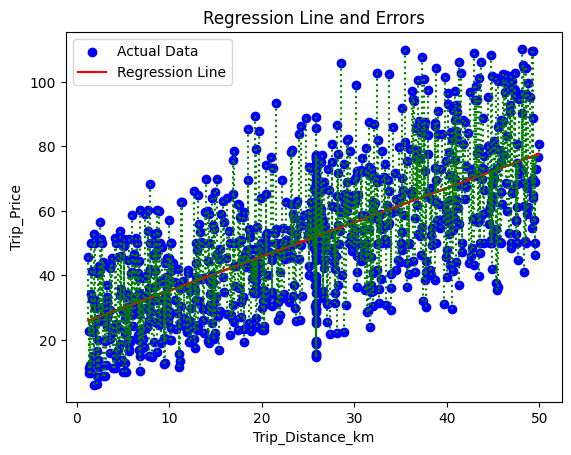

In [27]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
for i in range(len(X)):
    plt.plot([X.iloc[i, 0], X.iloc[i, 0]], [y.iloc[i], model.predict(X)[i]], color='green', linestyle='dotted')
plt.xlabel('Trip_Distance_km')
plt.ylabel('Trip_Price')
plt.title('Regression Line and Errors')
plt.legend()
plt.show()